<a href="https://colab.research.google.com/github/guilhermelaviola/GoalAnalysis/blob/main/MessiGoals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing all the necessary libraries:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style = 'whitegrid')
plt.style.use('seaborn-pastel')

<ipython-input-1-de0a920cb73a>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-pastel')


In [8]:
# Importing and displaying the last 10 goals scored:
goals_scored = pd.ExcelFile('goals-scored.xlsx')
leo = pd.read_excel(goals_scored, 'messi')
leo.tail(10)

,Competition,Round,Date,H/A,Team,Against,Score,Position,Minute,How it was scored,Assist
711,Leagues Cup,Group Stage,2023-07-26,H,Inter Miami CF,Atlanta United FC,4–0,RW,8,Right-footed shot,NaN
712,Leagues Cup,Group Stage,2023-07-26,H,Inter Miami CF,Atlanta United FC,4–0,RW,22,Right-footed shot,Robert Taylor
713,Leagues Cup,First Round,2023-08-03,H,Inter Miami CF,Orlando City SC,3–1,RW,7,Left-footed shot,Robert Taylor
714,Leagues Cup,First Round,2023-08-03,H,Inter Miami CF,Orlando City SC,3–1,RW,72,Right-footed shot,Josef Martínez
715,Leagues Cup,Round of 16,2023-08-07,A,Inter Miami CF,FC Dallas,7–9 on pens,RW,6,Left-footed shot,Jordi Alba
716,Leagues Cup,Round of 16,2023-08-07,A,Inter Miami CF,FC Dallas,7–9 on pens,RW,85,Direct free kick,NaN
717,Leagues Cup,Quarter-Finals,2023-08-12,H,Inter Miami CF,Charlotte FC,4–0,RW,86,Left-footed shot,Leonardo Campana
718,Leagues Cup,Semi-Finals,2023-08-16,A,Inter Miami CF,Philadelphia Union,1–4,RW,20,Left-footed shot,Josef Martínez
719,Leagues Cup,Final,2023-08-20,A,Inter Miami CF,Nashville SC,10–11 on pens,RW,23,Left-footed shot,NaN
720,Major League Soccer,28,2023-08-27,A,Inter Miami CF,New York Red Bulls,0–2,CF,89,Left-footed shot,Benja Cremaschi


I extracted this data from Transfermarkt.

In [9]:
# Displaying the number of rows and columns in the dataset:
leo.shape

(721, 11)

In [10]:
leo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Competition        721 non-null    object        
 1   Round              721 non-null    object        
 2   Date               721 non-null    datetime64[ns]
 3   H/A                721 non-null    object        
 4   Team               721 non-null    object        
 5   Against            721 non-null    object        
 6   Score              721 non-null    object        
 7   Position           721 non-null    object        
 8   Minute             721 non-null    object        
 9   How it was scored  718 non-null    object        
 10  Assist             499 non-null    object        
dtypes: datetime64[ns](1), object(10)
memory usage: 62.1+ KB


As you can see above, the dataset has 721 rows at moment (19/02/2024). Each row represents a goal Cristiano scored. And there are 12 columns:
1. Competition
2. Round
3. Date
4. H/A - Home or Away
5. Tean
6. Against
7. Final Score
8. Position
9. Minute
11. How it was scored
12. Assist



In [12]:
# Displaying the dataset after the columns were renamed:
leo.head()

,Competition,Round,Date,H/A,Team,Against,Score,Position,Minute,How it was scored,Assist
0,Segunda División B - Grupo III (-20/21),2,2004-09-05,H,FC Barcelona B,Girona FC,1–2,LW,65,Left-footed shot,Dani Fernández
1,Segunda División B - Grupo III (-20/21),4,2004-09-18,H,FC Barcelona B,RCD Espanyol B,2–0,LW,88,Left-footed shot,Dani Fernández
2,Segunda División B - Grupo III (-20/21),10,2004-10-31,A,FC Barcelona B,Villajoyosa CF,2–1,AM,2,NaN,NaN
3,Segunda División B - Grupo III (-20/21),14,2004-11-28,A,FC Barcelona B,UE Figueres,2–2,AM,20,NaN,NaN
4,Segunda División B - Grupo III (-20/21),17,2004-12-19,H,FC Barcelona B,CD Alcoyano,2–0,CF,40,Left-footed shot,NaN


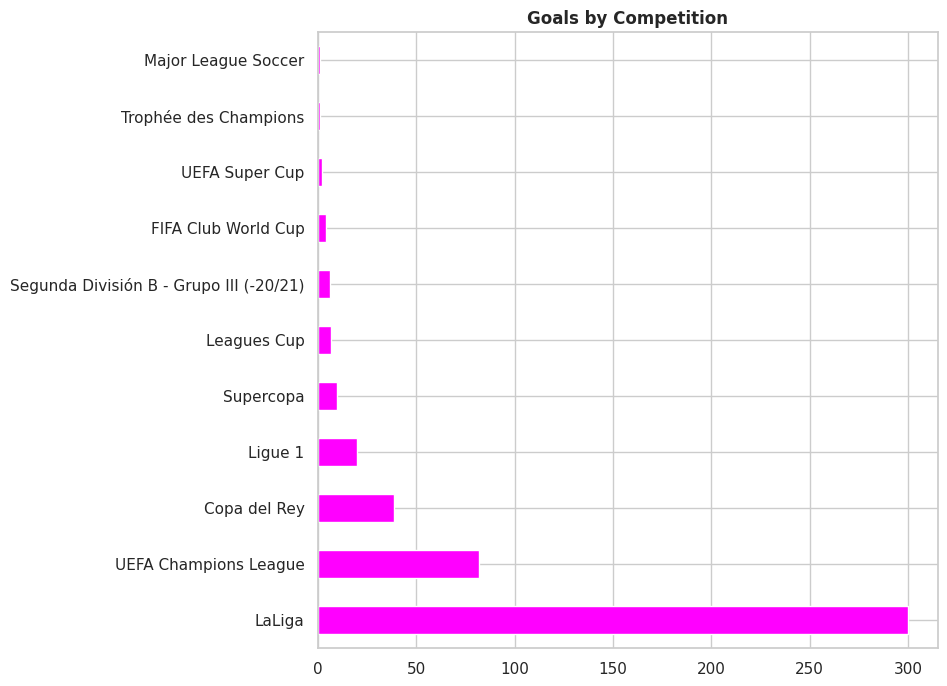

In [17]:
# Displaying goals scored by competition:
leo.groupby('Date').first()['Competition'].value_counts().plot(kind = 'barh', color = 'magenta', figsize = (8, 8))
plt.ylabel(None)
plt.title('Goals by Competition', fontweight = 'bold')
plt.show()

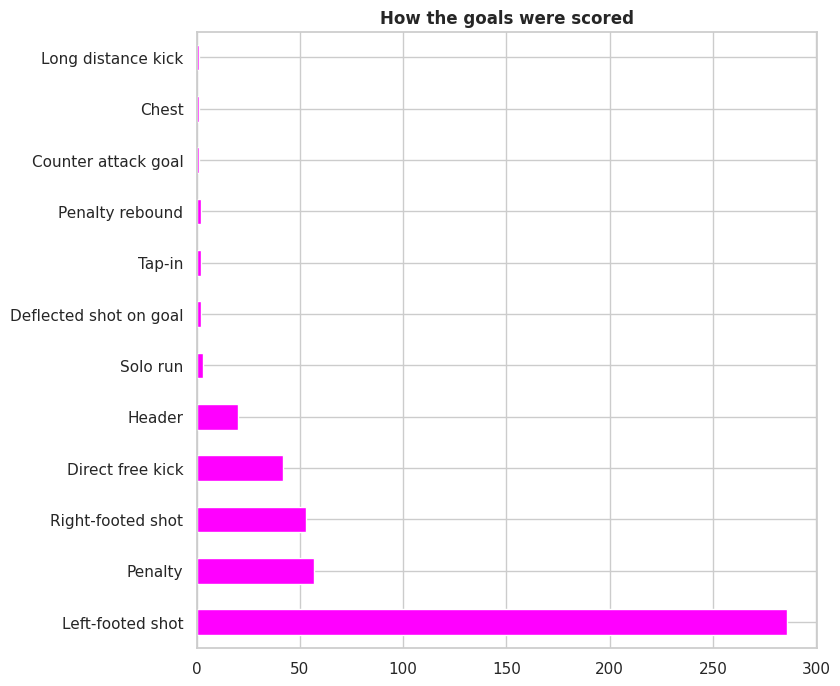

In [18]:
# Displaying goals scored by the way it was scored:
leo.groupby('Date').first()['How it was scored'].value_counts().plot(kind = 'barh', color = 'magenta', figsize = (8, 8))
plt.ylabel(None)
plt.title('How the goals were scored', fontweight = 'bold')
plt.show()

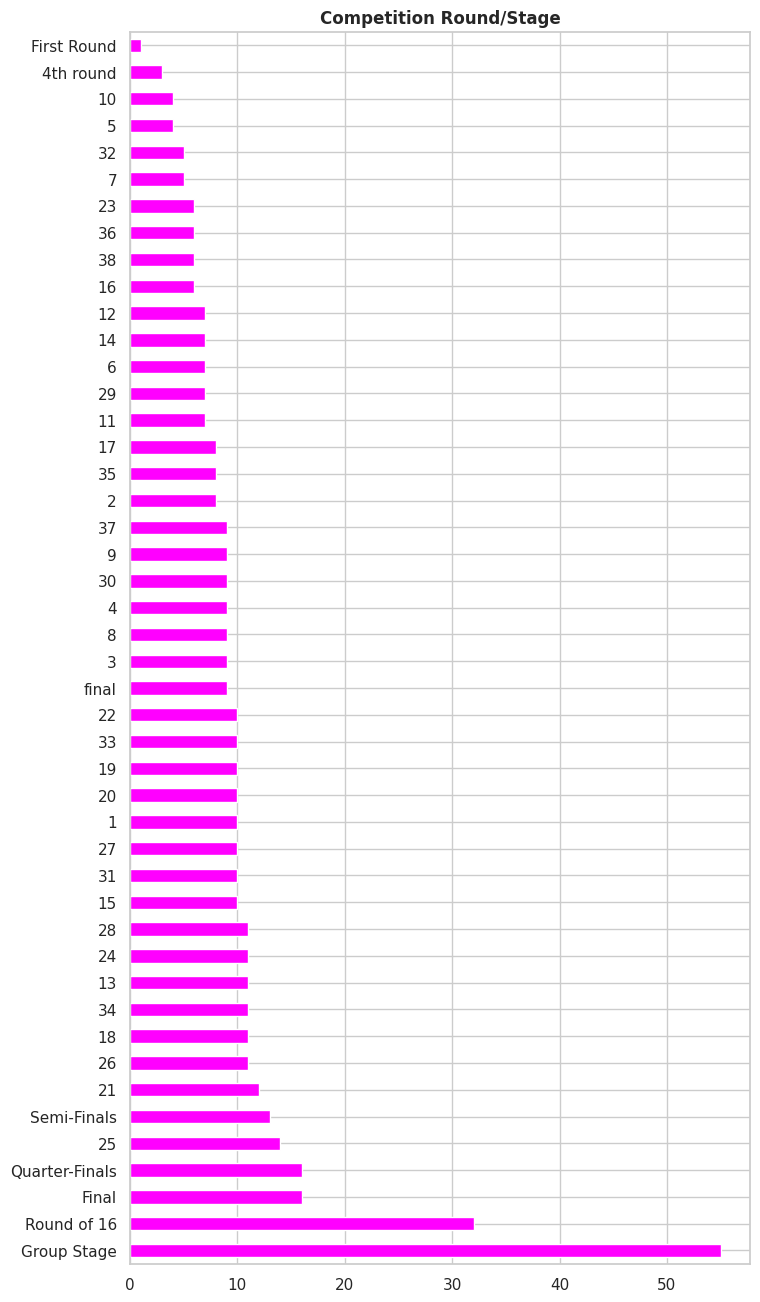

In [19]:
# Displaying the competition's round/stage the coals were scored:
leo.groupby('Date').first()['Round'].value_counts().plot(kind = 'barh', color = 'magenta', figsize = (8, 16))
plt.ylabel(None)
plt.title('Competition Round/Stage', fontweight = 'bold')
plt.show()

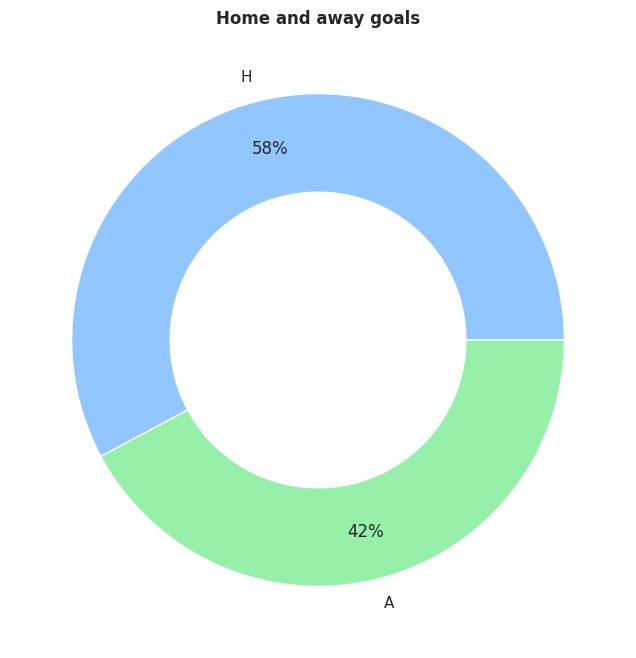

In [20]:
# Displaying goals scored by where it was scored (H or A):
leo.groupby('Date').first()['H/A'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Home and away goals', fontweight = 'bold')
plt.show()

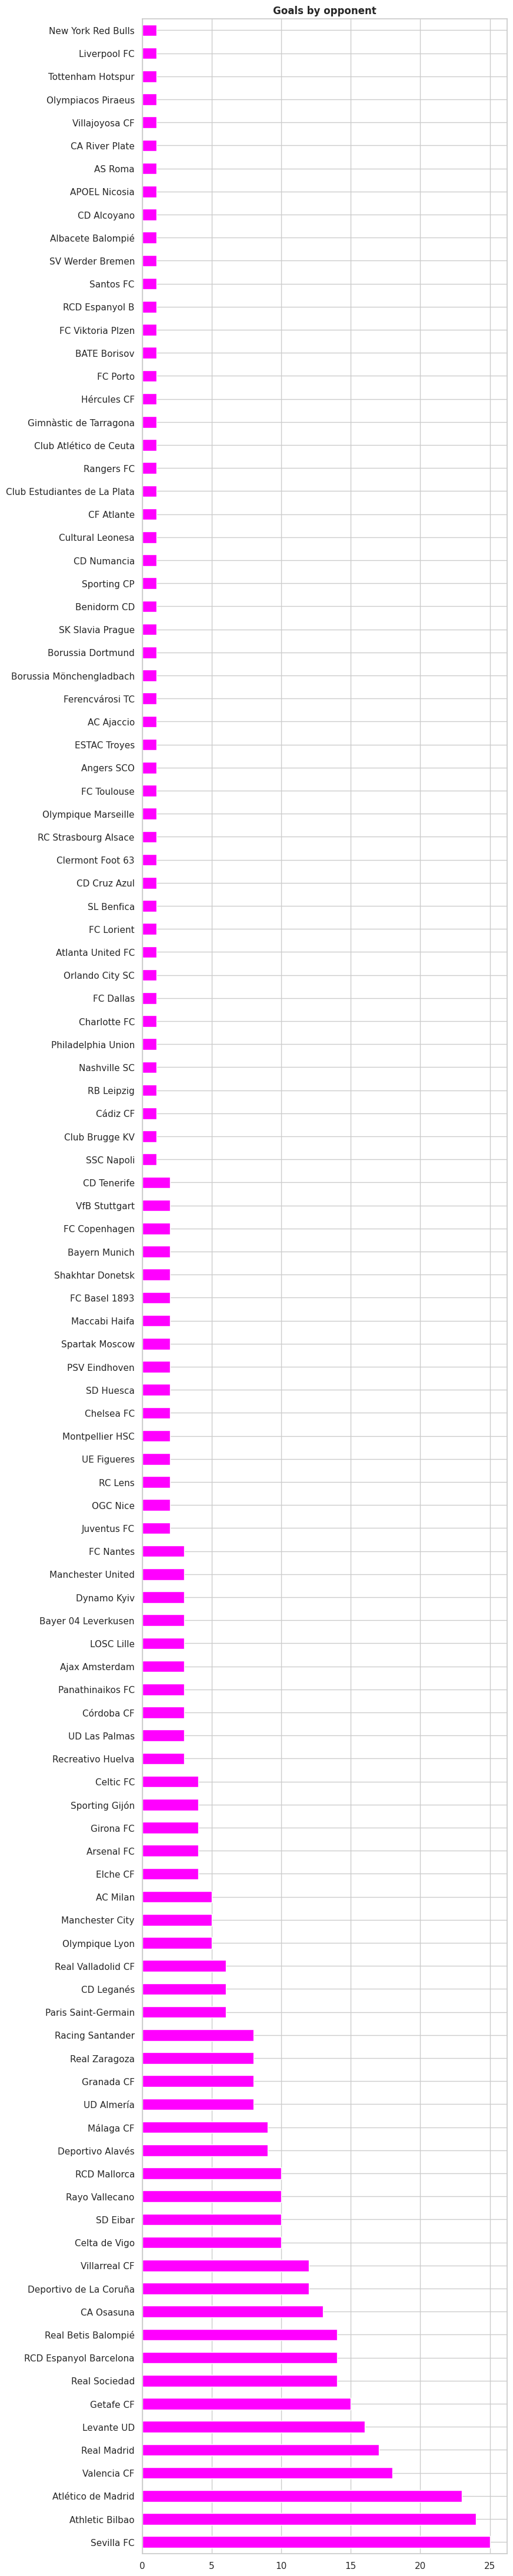

In [21]:
# Displaying goals scored by opponent:
leo.groupby('Date').first()['Against'].value_counts().plot(kind = 'barh', color = 'magenta', figsize = (8, 56))
plt.ylabel(None)
plt.title('Goals by opponent', fontweight = 'bold')
plt.show()

In [22]:
# Generating columns for day, month and year the goals were scored:
leo['Date'] = leo['Date'].map(pd.to_datetime)
leo['Day'] = leo['Date'].apply(lambda x : x.day)
leo['Month'] = leo['Date'].apply(lambda x : x.month)
leo['Year'] = leo['Date'].apply(lambda x : x.year)

print(leo.head())

                               Competition Round       Date H/A  \
0  Segunda División B - Grupo III (-20/21)     2 2004-09-05   H   
1  Segunda División B - Grupo III (-20/21)     4 2004-09-18   H   
2  Segunda División B - Grupo III (-20/21)    10 2004-10-31   A   
3  Segunda División B - Grupo III (-20/21)    14 2004-11-28   A   
4  Segunda División B - Grupo III (-20/21)    17 2004-12-19   H   

             Team         Against Score Position Minute How it was scored  \
0  FC Barcelona B       Girona FC   1–2       LW     65  Left-footed shot   
1  FC Barcelona B  RCD Espanyol B   2–0       LW     88  Left-footed shot   
2  FC Barcelona B  Villajoyosa CF   2–1       AM      2               NaN   
3  FC Barcelona B     UE Figueres   2–2       AM     20               NaN   
4  FC Barcelona B     CD Alcoyano   2–0       CF     40  Left-footed shot   

           Assist  Day  Month  Year  
0  Dani Fernández    5      9  2004  
1  Dani Fernández   18      9  2004  
2             NaN   

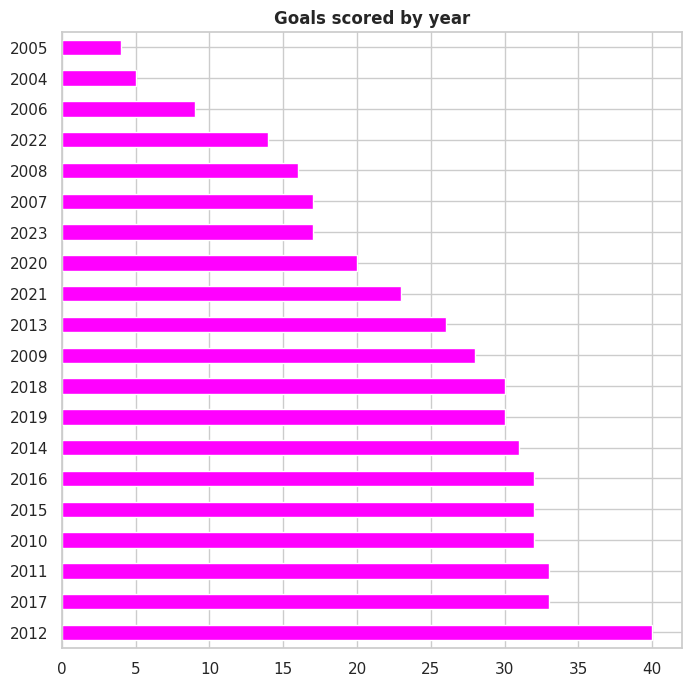

In [23]:
# Displaying goals scored by year:
leo.groupby('Date').first()['Year'].value_counts().plot(kind = 'barh', color = 'magenta', figsize = (8, 8))
plt.ylabel(None)
plt.title('Goals scored by year', fontweight = 'bold')
plt.show()

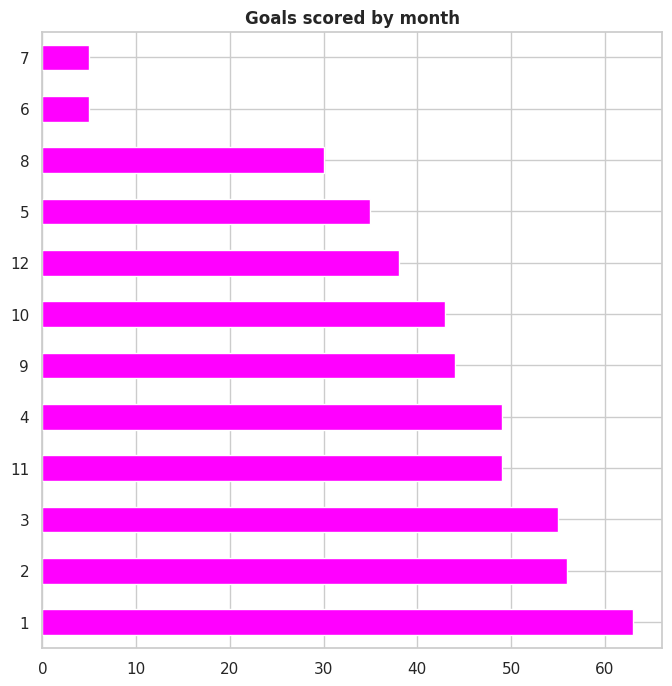

In [24]:
# Displaying goals scored by month:
leo.groupby('Date').first()['Month'].value_counts().plot(kind = 'barh', color = 'magenta', figsize = (8, 8))
plt.ylabel(None)
plt.title('Goals scored by month', fontweight = 'bold')
plt.show()

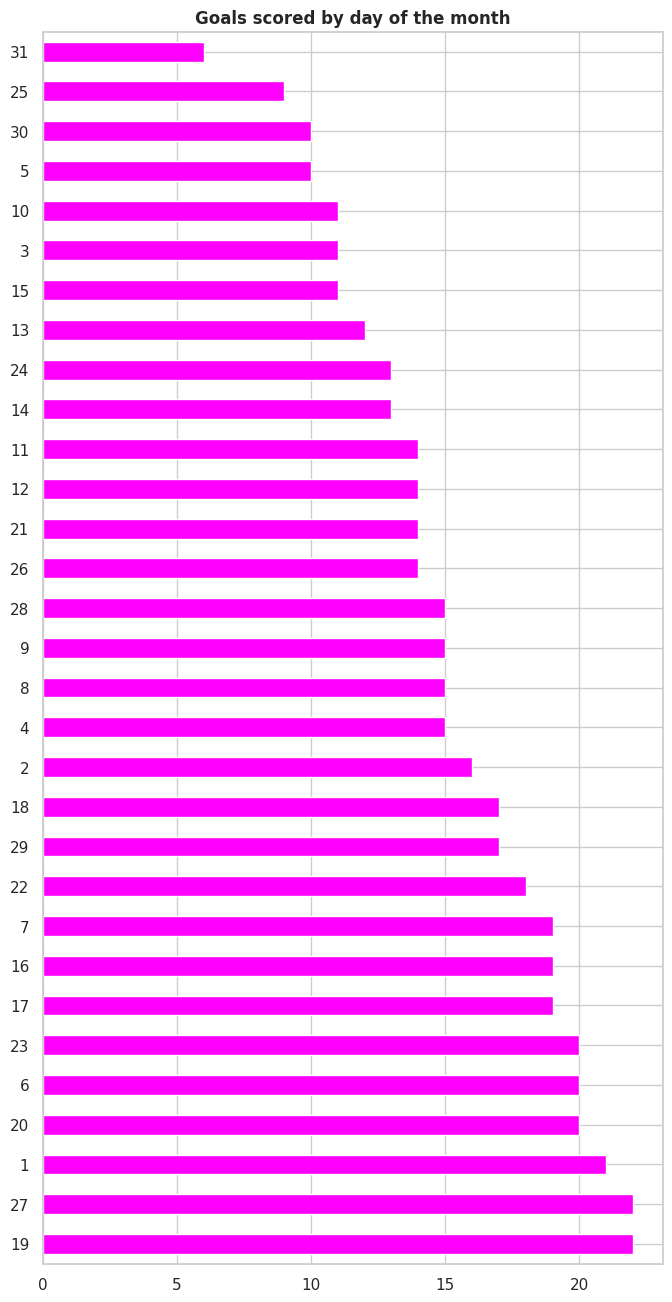

In [25]:
# Displaying goals scored by day of the month:
leo.groupby('Date').first()['Day'].value_counts().plot(kind = 'barh', color = 'magenta', figsize = (8, 16))
plt.ylabel(None)
plt.title('Goals scored by day of the month', fontweight = 'bold')
plt.show()

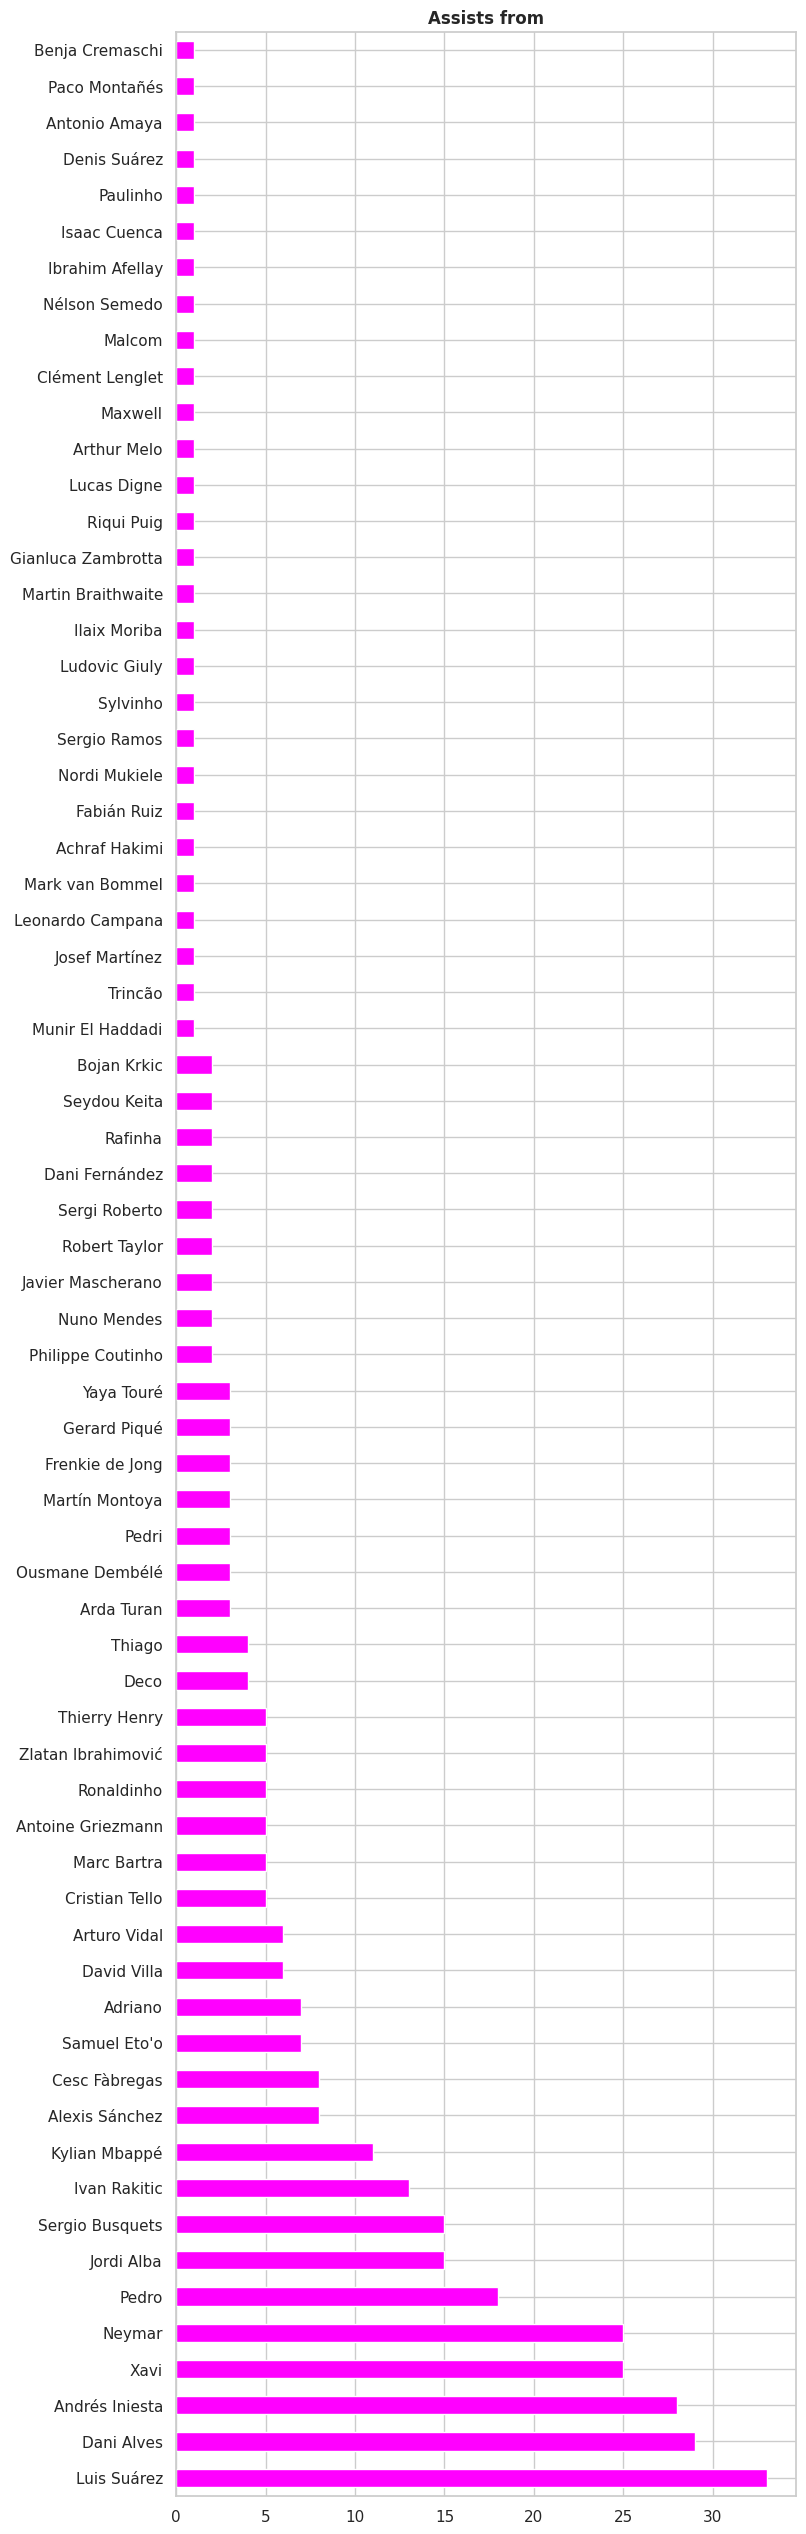

In [26]:
# Displaying who the assists came from
leo.groupby('Date').first()['Assist'].value_counts().plot(kind = 'barh', color = 'magenta', figsize = (8, 32))
plt.ylabel(None)
plt.title('Assists from', fontweight = 'bold')
plt.show()

<Axes: xlabel='Month', ylabel='Year'>

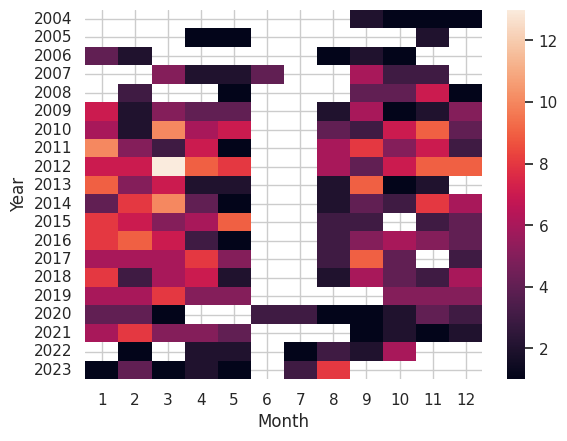

In [27]:
# Correlation of Year and Month with heatmap:
corr = leo.groupby(['Year', 'Month']).apply(lambda x : len(x))
corr = corr.unstack()
sns.heatmap(corr, annot = False)

In [29]:
def scored_in_first_or_second_half(timing):
  if timing < 45:
    result = 'First half'
  elif timing > 45 and timing < 90:
    result = 'Second half'
  else:
    result = 'Extra time'
  return result

leo['First or Second Half'] = leo['Minute'].apply(scored_in_first_or_second_half)
leo.head(10)

ValueError: invalid literal for int() with base 10: 'Minute'

In [ ]:
cr7.groupby('Minute').first()['First or Second Half'].value_counts().plot(kind = 'pie',
                                                              autopct = '%.0f%%',
                                                              figsize = (8, 8),
                                                              wedgeprops = dict(width = 0.4),
                                                              pctdistance = 0.8)
plt.ylabel(None)
plt.title('Breakdown of goals by half', fontweight = 'bold')
plt.show()

KeyError: ignored

In [ ]:
# Adding Racing Bar animation for :
cr7.Date = pd.to_datetime(cr7.Date, format = '%Y')

In [ ]:
#Preparing a pivot table:
racing_bar_data = cr7.pivot_table(values = 'Minute', index = 'Date', columns = 'Competition')

ValueError: invalid literal for int() with base 10: 'Minute'

In [ ]:
# Checking if there are any null value in the pivot table:
racing_bar_data.columns[racing_bar_data.isnull().sum() == 0]

Index([], dtype='object', name='Competition')

In [ ]:
# Converting the data into a cumulative sum over several years:
racing_bar_filled = racing_bar_data.interpolate(method = 'linear').fillna(method = 'bfill')
racing_bar_filled = racing_bar_filled.cumsum()

In [ ]:
# Oversampling the dataset with interpolation (linear) for a smooth transition in the frames of the snimation:
racing_bar_filled = racing_bar_filled.resample('1D').interpolate(method = 'linear')[::7]

ValueError: ignored

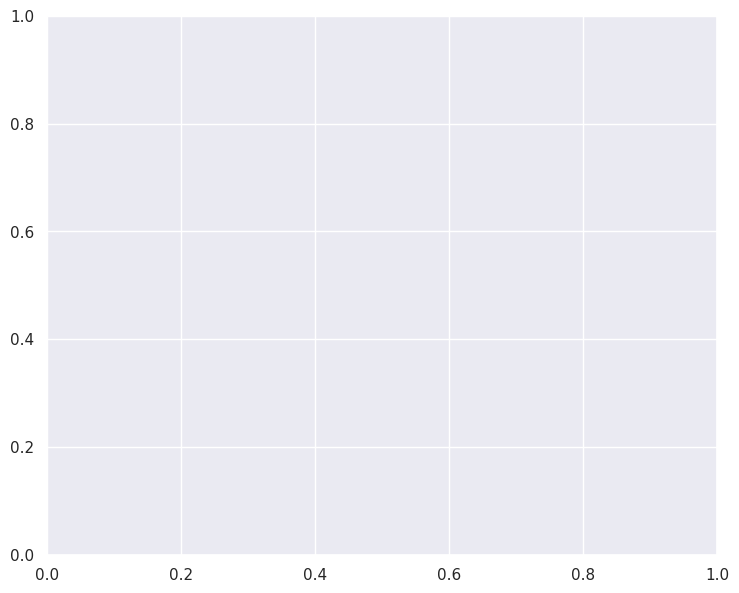

In [ ]:
# Creating and saving a Bar Chart Animation:
selected = racing_bar_filled.iloc[-1, :].sort_values(ascending = False)[:20].index
data = racing_bar_filled[selected].round()

fig, ax = plt.subplots(figsize = (9.3, 7))
fig.subplots_adjust(left = 0.18)

#Number of frames:
no_of_frames = data.shape[0]

# Initiating the barplot with the first rows of the dataframe:
bars = sns.barplot(y = data.columns, x = data.iloc[0, :], orient = 'h', ax = ax)
ax.set_xlim(0, 1500)
texts = [ax.text(0, i, 0, va = 'center') for i in range(data.shape[1])]
title_text = ax.text(650, -1, 'Date: ', fontsize = 12)
ax.set_xlabel(' ')
ax.set_ylabel(None)

def animate(i):
  y = data.iloc[i, :]

  # Updating the title of the barplot axis:
  title_text.set_text(f'Date: {str(data.index[i].date())}')

  # updating elements in both plots:
  for j, b, in enumerate(bars.patches):
    # updating each bar's height:
    b.set_width(y[j])

    # updating text for each bar (optional)
    texts[j].set_text(f'${y[j].astype(int)}M')
    texts[j].set_x(y[j])

animation = FuncAnimation(fig, animate, repeat = False,
                          frames = no_of_frames,
                          interval = 1, blit = False)
animation.save('goals.gif', writer = 'imagemagick', fps = 120)
plt.close(fig)